# EDA and Statistical Analysis of Mod Clothing Dataset

In [500]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

import scipy.stats 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Part A

In [501]:
li1 = {'price':[23,30, 20, 27, 44, 26, 35, 20, 29, 29, 25, 15, 18, 27, 19, 22, 12, 26, 34, 15, 27, 35, 26, 43, 35, 14, 24, 12, 23, 31,
       40, 35, 38, 57, 22, 42, 24, 21, 27, 33]}
df = pd.DataFrame(li1)
df.head()

,price
0,23
1,30
2,20
3,27
4,44


#### Q1. Compute the mean, median and the mode of the data

In [502]:
mean = df.mean()
median = df.median()
mode = df.mode()

In [503]:
print("Mean is : ",mean)

Mean is :  price    27.625
dtype: float64


In [504]:
print("Median is : ",median)

Median is :  price    26.5
dtype: float64


In [505]:
print("Mode is : ",mode)

Mode is :     price
0     27
1     35


#### Q2. Compute the range , variance and standard deviation of the data 

In [506]:
df_range = df.max() - df.min()
print('Range of the price:',df_range)

Range of the price: price    45
dtype: int64


In [507]:
df_var = df.var()
print('Variance of the price:',df_var)

Variance of the price: price    92.599359
dtype: float64


In [508]:
df_std = df.std()
print('Standard Deviation of the price:',df_std)

Standard Deviation of the price: price    9.622856
dtype: float64


#### Q3. Find the mean deviation for the data . 

In [509]:
mean_dev = np.sum((np.abs(df-df.mean())/len(df)))
print("Mean Deviation is : ",mean_dev)

Mean Deviation is :  price    7.4
dtype: float64


#### Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

Skewness = 3(x_bar - MD)/s

MD - median, s - standard deviation

In [510]:
skew = 3*(df.mean()-df.median())/df.std()
print('Pearson coefficient of skewness is : ',skew)

Pearson coefficient of skewness is :  price    0.350727
dtype: float64


From the skewness value it can be inferred that as skewness is positive sothe distibution is positively skewed.

#### Q5. Count the number of data values that fall within two standard deviations of  the mean. Compare this with the answer from Chebyshev’s Theorem

In [511]:
min1 = mean - df_std
max1 = mean + df_std

In [512]:
print("Minumum point is : ",min1)

Minumum point is :  price    18.002144
dtype: float64


In [513]:
print("Maximum point is : ",max1)

Maximum point is :  price    37.247856
dtype: float64


In [514]:
print("Count of numbers within range is : ",df[(df>min1) & (df<max1)].count())

Count of numbers within range is :  price    28
dtype: int64


There are 28 data values fall within one standard deviation of the mean.

#### Q6. Find the three quartiles and the interquartile range (IQR)

In [515]:
q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.50)
q3 = df['price'].quantile(0.75)
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
iqr = q3-q1
print('Inter Quartile Range (IQR):',iqr)

Q1: 21.75
Q2: 26.5
Q3: 34.25
Inter Quartile Range (IQR): 12.5


#### Q7. Are there any outliers in the data set ?

In [516]:
q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.50)
q3 = df['price'].quantile(0.75)
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
iqr = q3-q1
print('Inter Quartile Range (IQR):',iqr)

max1 = q3 + 1.5* iqr
min1 = q1 - 1.5* iqr

print('Max value:' ,max1)
print('Min Value:' ,min1)

Q1: 21.75
Q2: 26.5
Q3: 34.25
Inter Quartile Range (IQR): 12.5
Max value: 53.0
Min Value: 3.0


In [517]:
outliers = df[(df > max1) | (df < min1)]
outliers.count()

price    1
dtype: int64

1 outliers are present in the dataset.

#### Q8. Draw a boxplot of the dataset to confirm .

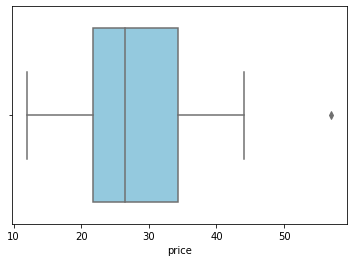

In [518]:
sns.boxplot(df.price,color='skyblue')
plt.show()

From the above boxplot we can confirm that 1 outliers are present in the dataset

#### Q9. Find the percentile rank of the datapoint 25.0.

In [519]:
df_p_rank = df.rank()
df['Rank'] = df.rank(pct=True)

In [520]:
df[df.price==25]

,price,Rank
10,25,0.425


#### Q10. What is the probability that a shirt cost is above 25 dollars?

In [521]:
x = df[df>25].count()
n = len(df)
p=x/n

In [522]:
print('Probability of young adult has a BMI above 25.0 is',p[0]*100,'%')

Probability of young adult has a BMI above 25.0 is 57.49999999999999 %


#### Q11. Create a frequency distribution for the data and visualize it appropriately

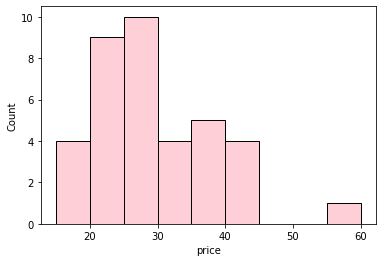

In [523]:
sns.histplot(df.price,bins=[15,20,25,30,35,40,45,50,55,60],color='pink')
plt.show()

#### Q12. Create a probability distribution of the data and visualize it appropriately.

In [524]:
dfc = df.copy()
dfc['Prob_dist']=dfc.price.rank(pct=True)

<AxesSubplot:xlabel='Prob_dist', ylabel='Density'>

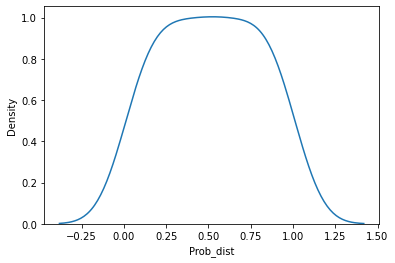

In [525]:
sns.kdeplot(dfc.Prob_dist)

#### Q13. What is the shape of the distribution of this dataset? Create an  appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean shirt prices. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

<AxesSubplot:xlabel='price', ylabel='Density'>

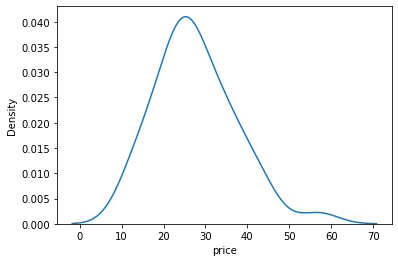

In [526]:
sns.kdeplot(df.price)

In [527]:
li1 = []
random.seed(100)
for i in range(0,100):
    li1.append(list(random.choices(df.price,k=5)))

<AxesSubplot:ylabel='Density'>

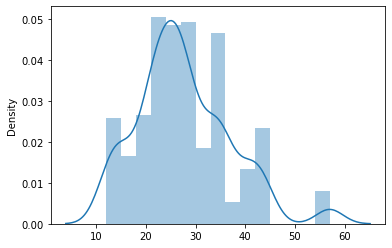

In [528]:
sns.distplot(li1)

#### Q14. Treat this dataset as a binomial distribution where p is the probability that a shirt costs above 25 dollars. What is the probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars

In [529]:
n = 10
x = 7

In [530]:
prob = stats.binom.pmf(x,n,p[0])

print("Probability is : ",round(prob,4))

Probability is :  0.1914


There is 0.1914 the probability that out of a random sample of 10 shirts exactly 7 are having cost greater than
25.0

#### Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25 dollars . Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars.


In [531]:
p1 = 0.60
n = 10
x = 7

round(stats.binom.pmf(x,n,p1),5)

0.21499

There is 21.49 % probability that in a random sample of 10 shirts exactly 7 of them will have will have a price is less than 25.0.

#### Q16. Compute a 95% Confidence Interval for the true price of a shirt in the NuCloth website using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [532]:
x_bar = df.mean()
sigma = df.std()
n = len(df)

In [533]:
interval = stats.t.interval(0.95,loc=x_bar,scale=sigma/np.sqrt(n),df=n-1)
interval

(array([24.54746134,  0.41916631]), array([30.70253866,  0.60583369]))

As standard deviation of population is not given thus we will use t-test here.

Proportion of 95% Confidence Interval for the true price of a shirt in the NuCloth website using appropriate 
#distribution (24.54,30.70)

#### Q17. A data scientist wants to estimate with 95% confidence the true proportion of shirts having price greater than 25 dollars in the NuCloth website. A recent study showed that 60% of all shirts have a price greater than 25 dollars. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [534]:
alpha = 0.05
x_bar = df.mean()
sigma = df.std()
n = len(df)
moe = 2
z_alpha = stats.norm.isf(alpha/2)

In [535]:
n2 = ((z_alpha*sigma)/moe)**2
print(round(n2[0]))

89


From the above data we can inferred that minimum sample required are 89

#### Q18. The same data scientist wants to estimate the true proportion of shirts having price greater than 25 dollars. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [536]:
alpha = 0.1
x_bar = df.mean()
sigma = df.std()
n = len(df)
moe = 5
z_alpha = stats.norm.isf(alpha/2)

In [537]:
n2 = ((z_alpha*sigma)/moe)**2
print(round(n2[0]))

10


From the above data we can inferred that minimum sample required are 10

#### Q19. NuCloth claims that currently 80% of all shirts have prices greater than 25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30 shirts only 23 are having prices above 25 dollars.

In [538]:
#H0: p = 0.8
#H1: p != 0.8

In [539]:
n=30
p_samp = 23/30
hypo_p = 0.8 

In [540]:
z_stat = (p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / n)
p_value = stats.norm.sf(z_stat)
print('Test statistic:', z_stat)
print('p-value:', p_value)

Test statistic: -0.45643546458763834
p-value: 0.6759615659304269


We failed to reject null so claim is true that currently 80% of all shirts have prices greater than 25 dollars 

#### Q20. A data scientist is researching the hypothesis that the average price of a shirt in NuCloth is higher than the supermarket. So he collects data from NuCloth and the supermarket that the average shirt price of shirts in NuCloth is 36 dollars vs 34 dollars in the supermarket. The standard deviations are 7.6 and 5.8 respectively.Suppose the data scientist got these values after randomly selecting 100 shirts from each place.

a. What hypothesis would he use to compare the shirt prices of NuCloth vs
Supermarket

b. What are critical values to be used?

c. What statistical test will be used to compare these prices?

d. Complete the test and obtain the P-value.

e. Summarize his conclusion based on the P-value.

In [541]:
# H0 : mu1 - mu2 <=0
# H1 : mu1 - mu2 >0

In [542]:
x1_bar = 36
x2_bar = 34
s1 = 7.6
s2 = 5.8
n1 = 100
n2 = 100

print("Degree of freedom is : ",(n1+n2-2))

Degree of freedom is :  198


In [543]:
t_critical = stats.t.isf(q = 0.05,df = 198)
print('Critical values for two-tailed t-test:', - t_critical, 'and', t_critical)

Critical values for two-tailed t-test: -1.6525857836172082 and 1.6525857836172082


In [544]:
# calculate pooled standard deviation
s = np.sqrt((((n1-1)*s1**2) + ((n2-1)*s2**2)) / (n1 + n2 - 2))
t_stat = (x1_bar - x2_bar) / (s * np.sqrt(1/n1 + 1/n2))
print('Test Statistic:', t_stat)

Test Statistic: 2.0919769632765197


In [545]:
p_value = stats.t.sf(t_stat, df = 198)   
print('p-value:', p_value)

p-value: 0.01885775783786387


Since p_value < level of significance, therefore we Reject H0,

i.e the average price of a shirt in NuCloth is higher than the supermarket

### Part B

#### Q1. Read the datasets, Check the data types and Change the data types appropriately.

In [546]:
df1=pd.read_json("C:\\Users\\hp\\Downloads\\5. EDA\\project 4\\project 4\\project 4\\modcloth_final_data.json", orient = 'records',lines =True)
df1.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [547]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [548]:
df1.isnull().sum()/len(df1)

item_id           0.000000
waist             0.965189
size              0.000000
quality           0.000821
cup size          0.075553
hips              0.322817
bra size          0.072690
category          0.000000
bust              0.856818
height            0.013371
user_name         0.000000
length            0.000423
fit               0.000000
user_id           0.000000
shoe size         0.662822
shoe width        0.775251
review_summary    0.081230
review_text       0.081230
dtype: float64

Here columns shoe size,shoe width,bust and waist  are columns with mpre than 70% null values. So we can drop those columns

In [549]:
df1.drop('waist',axis=1,inplace=True)

In [550]:
df1.drop(columns=['shoe width','shoe size'],axis=1,inplace=True)

In [551]:
df1.drop('bust',axis=1,inplace=True)

In [552]:
df1.head()

,item_id,size,quality,cup size,hips,bra size,category,height,user_name,length,fit,user_id,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,5ft 6in,Emily,just right,small,991571,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN
2,123373,7,2.0,b,NaN,32.0,new,5ft 7in,Ugggh,slightly long,small,395665,NaN,NaN
3,123373,21,5.0,dd/e,NaN,NaN,new,NaN,alexmeyer626,just right,fit,875643,NaN,NaN
4,123373,18,5.0,b,NaN,36.0,new,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN


Now we want to conver datapoint in height column

#### Q2. Change the height column datatype to float after converting the values as shown Below. 5.7

In [553]:
df1['height_v'] = df1['height'].apply(lambda x : x.strip('in').replace(' ','').split('ft') if isinstance(x,str) else x)

In [554]:
for i,j in enumerate(df1.height_v):
    if isinstance(j,list):
        if j[1].isdigit():
            df1.loc[i,'height_v'] = int(j[0])+(int(j[1])/10)
        else:
            df1.loc[i,'height_v'] = int(j[0])

In [555]:
df1.drop('height',axis=1,inplace=True)

In [556]:
df1.rename(columns={'height_v':'height'},inplace=True)

In [557]:
df1.height

0        5.6
1        5.2
2        5.7
3        NaN
4        5.2
        ... 
82785    5.8
82786    5.5
82787    5.4
82788    5.3
82789      6
Name: height, Length: 82790, dtype: object

Now we will fill null values with median or mean or mode based on analysis

#### Q3. Rename the names of the columns which have space in between the column. Ex: shoe size as shoe_size etc.

In [558]:
df1.rename(columns={'cup size':'cup_size','bra size':'bra_size'},inplace=True)

#### Q4. Check the missing values and Identify the distribution of the variables to impute the missing values. Explain based on your analysis decide the features which can be dropped and Which can be imputed. And also explain the reason to choose the metric that you have chosen to impute the null values

In [559]:
df1.isnull().sum()/len(df1)

item_id           0.000000
size              0.000000
quality           0.000821
cup_size          0.075553
hips              0.322817
bra_size          0.072690
category          0.000000
user_name         0.000000
length            0.000423
fit               0.000000
user_id           0.000000
review_summary    0.081230
review_text       0.081230
height            0.013371
dtype: float64

<AxesSubplot:xlabel='quality'>

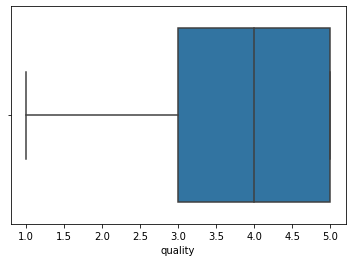

In [560]:
sns.boxplot(df1.quality)

In [561]:
df1.quality.fillna(df1.quality.mean(),inplace=True)

In [562]:
df1.isnull().sum()/len(df1)

item_id           0.000000
size              0.000000
quality           0.000000
cup_size          0.075553
hips              0.322817
bra_size          0.072690
category          0.000000
user_name         0.000000
length            0.000423
fit               0.000000
user_id           0.000000
review_summary    0.081230
review_text       0.081230
height            0.013371
dtype: float64

In [563]:
df1.cup_size.mode()

0    c
Name: cup_size, dtype: object

In [564]:
df1['cup_size'].fillna('c',inplace=True)

In [565]:
df1.isnull().sum()/len(df1)

item_id           0.000000
size              0.000000
quality           0.000000
cup_size          0.000000
hips              0.322817
bra_size          0.072690
category          0.000000
user_name         0.000000
length            0.000423
fit               0.000000
user_id           0.000000
review_summary    0.081230
review_text       0.081230
height            0.013371
dtype: float64

<AxesSubplot:xlabel='bra_size'>

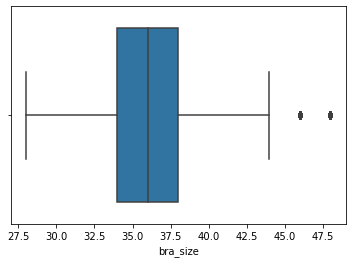

In [566]:
sns.boxplot(df1['bra_size'])

In [567]:
df1['bra_size'].fillna(df1['bra_size'].median(),inplace=True)

In [568]:
df1.isnull().sum()/len(df1)

item_id           0.000000
size              0.000000
quality           0.000000
cup_size          0.000000
hips              0.322817
bra_size          0.000000
category          0.000000
user_name         0.000000
length            0.000423
fit               0.000000
user_id           0.000000
review_summary    0.081230
review_text       0.081230
height            0.013371
dtype: float64

In [569]:
df1.isnull().sum()/len(df1)

item_id           0.000000
size              0.000000
quality           0.000000
cup_size          0.000000
hips              0.322817
bra_size          0.000000
category          0.000000
user_name         0.000000
length            0.000423
fit               0.000000
user_id           0.000000
review_summary    0.081230
review_text       0.081230
height            0.013371
dtype: float64

In [570]:
df1.length.mode()

0    just right
Name: length, dtype: object

In [571]:
df1.length.fillna('just right',inplace=True)

In [572]:
df1.isnull().sum()/len(df1)

item_id           0.000000
size              0.000000
quality           0.000000
cup_size          0.000000
hips              0.322817
bra_size          0.000000
category          0.000000
user_name         0.000000
length            0.000000
fit               0.000000
user_id           0.000000
review_summary    0.081230
review_text       0.081230
height            0.013371
dtype: float64

<AxesSubplot:xlabel='height'>

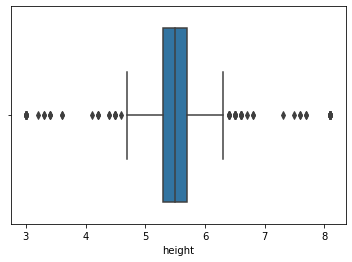

In [573]:
sns.boxplot(df1.height)

In [574]:
df1.height.skew()

0.19072797714922676

In [575]:
df1.height.fillna(df1.height.mean(),inplace=True)

In [576]:
df1.isnull().sum()/len(df1)

item_id           0.000000
size              0.000000
quality           0.000000
cup_size          0.000000
hips              0.322817
bra_size          0.000000
category          0.000000
user_name         0.000000
length            0.000000
fit               0.000000
user_id           0.000000
review_summary    0.081230
review_text       0.081230
height            0.000000
dtype: float64

In [577]:
r = df1.review_summary.mode()[0]
t = df1.review_text.mode()[0]

In [578]:
df1['review_summary'].fillna(r,inplace=True)

In [579]:
df1.review_text.fillna(t,inplace=True)

In [580]:
df1.hips.mean()

40.358500998858446

In [581]:
df1.head()

,item_id,size,quality,cup_size,hips,bra_size,category,user_name,length,fit,user_id,review_summary,review_text,height
0,123373,7,5.0,d,38.0,34.0,new,Emily,just right,small,991571,Love it!,Love it!,5.600000
1,123373,13,3.0,b,30.0,36.0,new,sydneybraden2001,just right,small,587883,Love it!,Love it!,5.200000
2,123373,7,2.0,b,NaN,32.0,new,Ugggh,slightly long,small,395665,Love it!,Love it!,5.700000
3,123373,21,5.0,dd/e,NaN,36.0,new,alexmeyer626,just right,fit,875643,Love it!,Love it!,5.515004
4,123373,18,5.0,b,NaN,36.0,new,dberrones1,slightly long,small,944840,Love it!,Love it!,5.200000


In [582]:
li9 = df1.select_dtypes(include='object').drop('user_name',axis=1).columns
li9

Index(['cup_size', 'category', 'length', 'fit', 'review_summary',
       'review_text'],
      dtype='object')

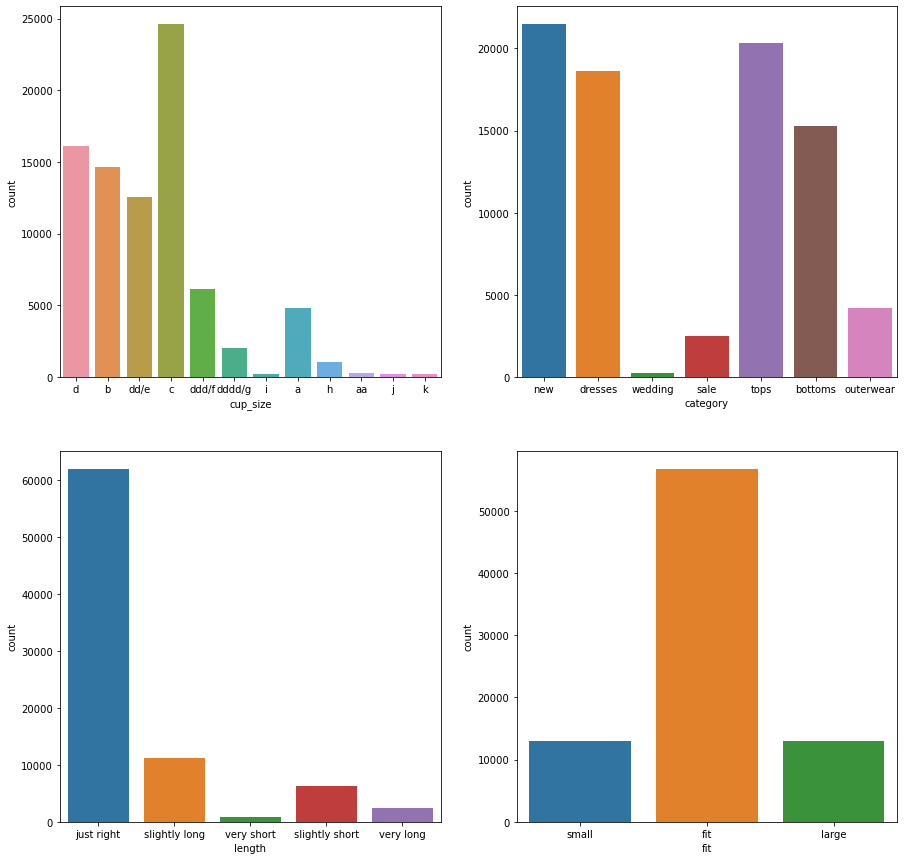

In [583]:
fig,ax = plt.subplots(2,2,figsize=(15,15))

sns.countplot(df1[li9[0]],ax=ax[0][0])
sns.countplot(df1[li9[1]],ax=ax[0][1])
sns.countplot(df1[li9[2]],ax=ax[1][0])
sns.countplot(df1[li9[3]],ax=ax[1][1])
plt.show()

In [584]:
print(df1[df1['cup_size']=='c']['hips'].mean())
print(df1[df1['category']=='new']['hips'].mean())
print(df1[df1['length']=='just right']['hips'].mean())
print(df1[df1['fit']=='fit']['hips'].mean())

mh = ((df1[df1['cup_size']=='c']['hips'].mean())+(df1[df1['category']=='new']['hips'].mean())+(df1[df1['length']=='just right']['hips'].mean())+(
df1[df1['fit']=='fit']['hips'].mean()))/4

mh1 = round(mh,1)
mh1

39.842903203677025
40.38297286127566
40.355922510544
40.05358024050074


40.2

We can see that mean means of hips column for all catgories with highest frquency in all categorical columns is close to 40.1588 so we
can fill null values with this value

In [585]:
df1.hips.fillna(mh1,inplace=True)

In [586]:
df1.isnull().sum()/len(df1)

item_id           0.0
size              0.0
quality           0.0
cup_size          0.0
hips              0.0
bra_size          0.0
category          0.0
user_name         0.0
length            0.0
fit               0.0
user_id           0.0
review_summary    0.0
review_text       0.0
height            0.0
dtype: float64

Now our dataset has 0 null values and

#### Q5. Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3

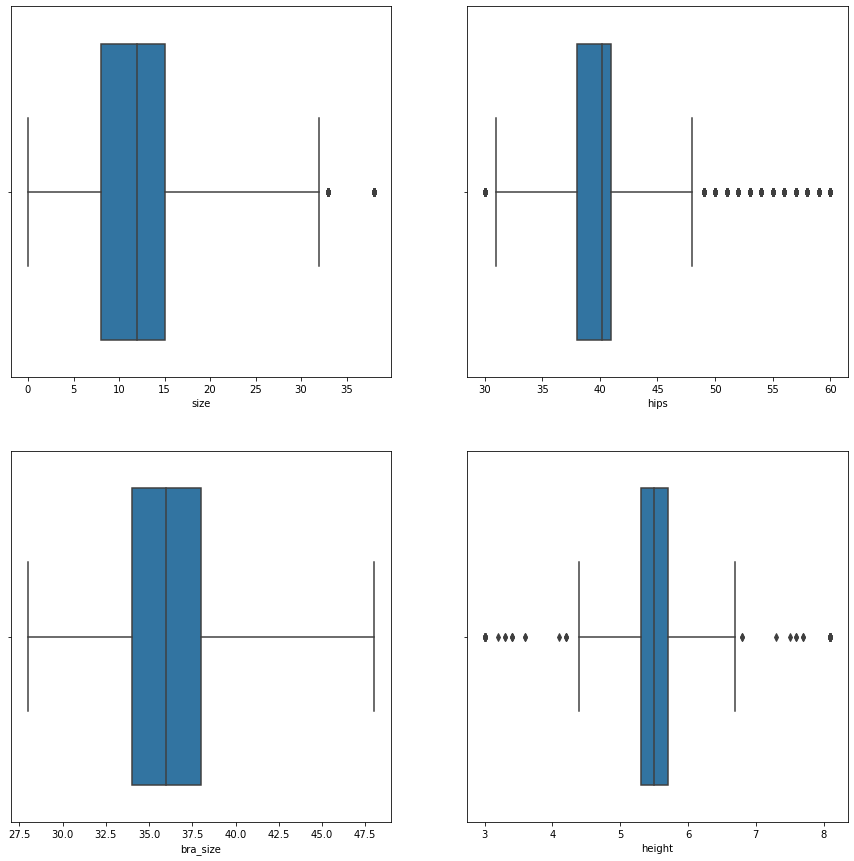

In [587]:
li10 = ['size','hips','bra_size','height']

fig,ax = plt.subplots(2,2,figsize=(15,15))

for i,j in zip(li10,ax.flatten()):
    sns.boxplot(df1[i],whis=2.5,ax=j)

#### Q6. Check for the category dress review and visualize the top 10 reviews using any relevant plot. Identify the negative reviews if there are any.

In [588]:
dd = df1.groupby('review_summary')['review_summary'].count().sort_values(ascending=False)
dd.head(10)

review_summary
Love it!                     6910
I absolutely love this dr     124
I really wanted to love t      92
Love it                        92
I love this dress so much      84
This is one of my favorit      83
.                              76
I get so many compliments      71
Perfect!                       69
I love everything about t      63
Name: review_summary, dtype: int64

<AxesSubplot:ylabel='review_summary'>

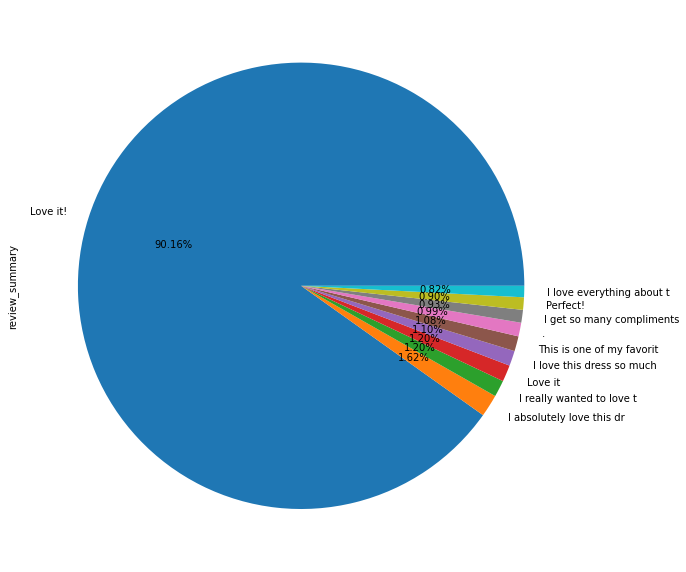

In [589]:
plt.figure(figsize=(10,15))
mcx = dd.head(10)
mcx.plot(kind = 'pie' , autopct = '%.2f%%')

#### Q7. Find out the average shoe size for the different fits of the customer. Visualize using any relevant plot. Explain that, Is there any significant different shoe sizes for different fits

In [590]:
df1.head()

,item_id,size,quality,cup_size,hips,bra_size,category,user_name,length,fit,user_id,review_summary,review_text,height
0,123373,7,5.0,d,38.0,34.0,new,Emily,just right,small,991571,Love it!,Love it!,5.600000
1,123373,13,3.0,b,30.0,36.0,new,sydneybraden2001,just right,small,587883,Love it!,Love it!,5.200000
2,123373,7,2.0,b,40.2,32.0,new,Ugggh,slightly long,small,395665,Love it!,Love it!,5.700000
3,123373,21,5.0,dd/e,40.2,36.0,new,alexmeyer626,just right,fit,875643,Love it!,Love it!,5.515004
4,123373,18,5.0,b,40.2,36.0,new,dberrones1,slightly long,small,944840,Love it!,Love it!,5.200000


<AxesSubplot:xlabel='fit'>

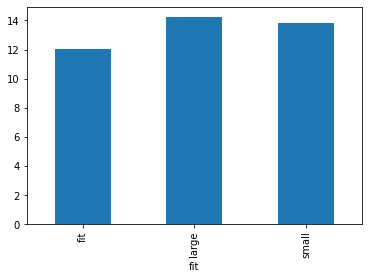

In [591]:
df1.groupby('fit')['size'].mean().plot(kind='bar')

#### Q8. Identify the customer’s common shoe width and average size for those who purchased the maximum quality. Is the mode of shoe width affect the user review? Visualize using the appropriate plot.

Shoe size and Show width both the columns were consisting of 77% and 66% null values. So we had to drop those columns 

#### Q9 Extract the records belonging to the top 10 reviews, and then find the review summary for the different cup sizes.The basic analysis explains what you would try to infer. Try to use visualization.

In [592]:
df1.groupby('review_summary')['review_summary'].count().sort_values(ascending = False).head(10)

review_summary
Love it!                     6910
I absolutely love this dr     124
I really wanted to love t      92
Love it                        92
I love this dress so much      84
This is one of my favorit      83
.                              76
I get so many compliments      71
Perfect!                       69
I love everything about t      63
Name: review_summary, dtype: int64

In [593]:
df1.groupby('cup_size')['review_summary'].count().sort_values(ascending = False).head(10)

cup_size
c         24625
d         16149
b         14628
dd/e      12557
ddd/f      6117
a          4791
dddd/g     2008
h          1042
aa          296
j           200
Name: review_summary, dtype: int64

#### Q10. Identify the most common review that we got from the customer whose hips size is greater than 35. Find out what kind of inference you can make.

In [594]:
df1[df1.hips>35]['review_summary'].mode()

0    Love it!
Name: review_summary, dtype: object

In [595]:
df1[df1.hips==35]['fit'].mode()

0    fit
Name: fit, dtype: object

In [596]:
df1[df1.hips==35]['length'].mode()

0    just right
Name: length, dtype: object

Here we can see that people with hip size greater than 35 are mostly using fit clothes  and overall review is that they loved the product.

So we can infer that the company is mainly famous for manufacturing body fit clothes

#### Q11.  What is the relationship between height and weight? Describe what kind of relationship it has

There is no relation as weight column is not given

#### Q12. Plot the pair plot forthe numerical plot. Explain according to your problem statement how the pair plot would help you.

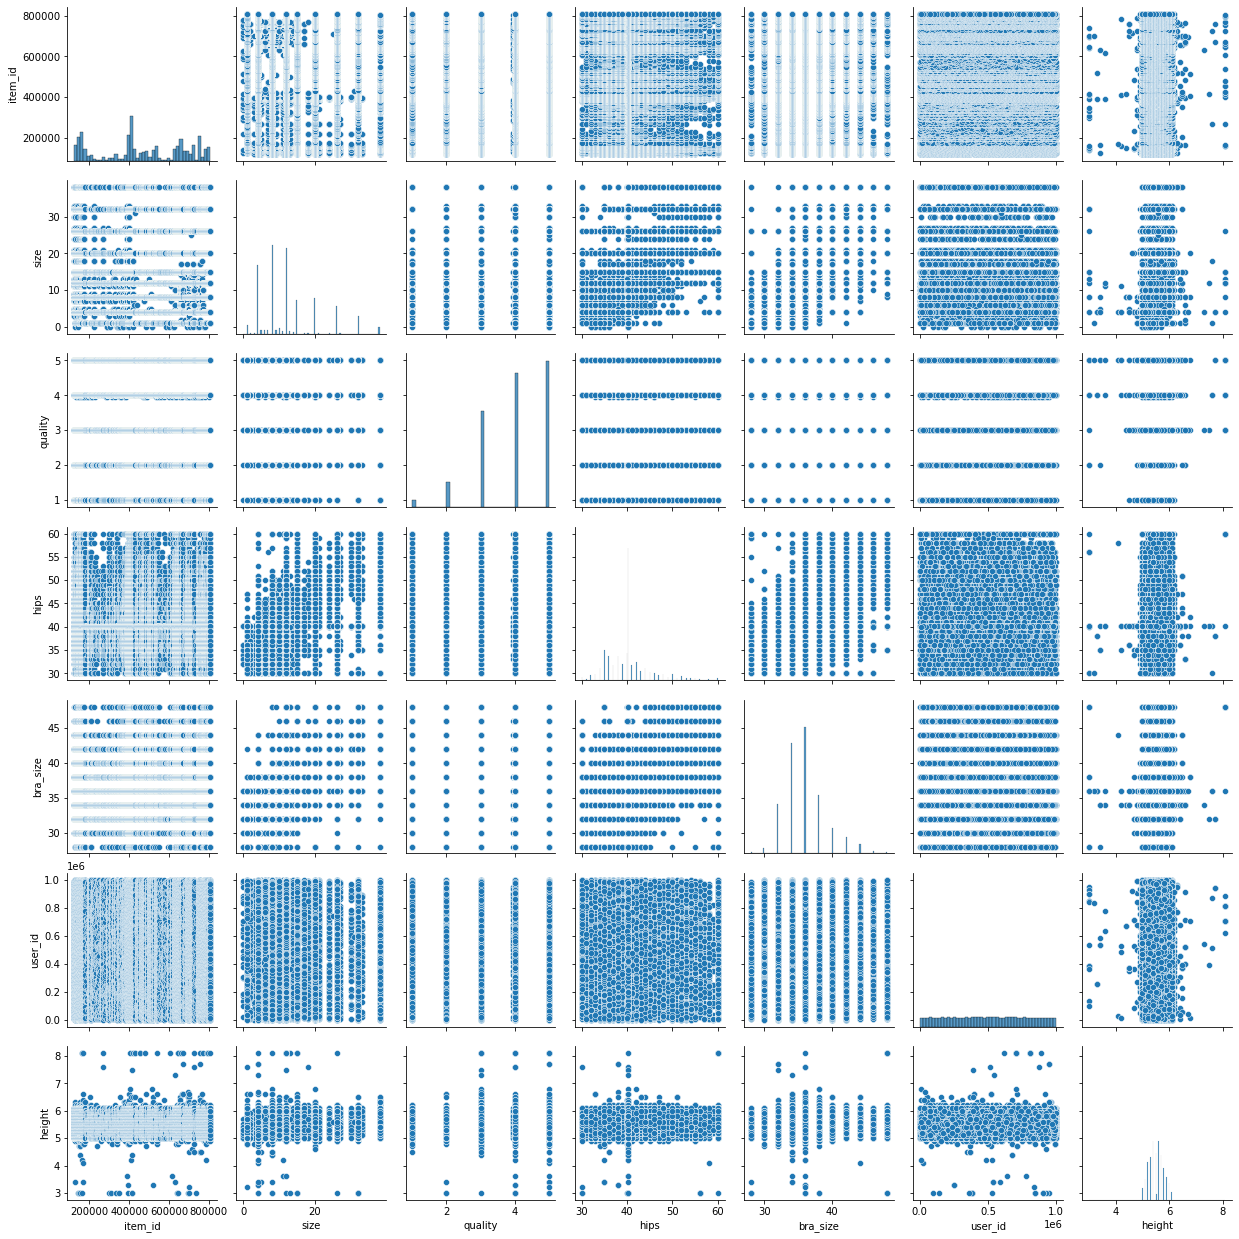

In [597]:
sns.pairplot(data =df1.select_dtypes(include = np.number))

Pair plot gives us clear insights and relationship can be observed very quickly and clearly it also covers all the variables 

### Statistical analysis

#### Q1. Test the claim that the category feature and review summary have any relationship among them. The level of significance is 5%.


Here both variables are categorical ,so we will need chisquare test of independence

In [598]:
# H0 : Variables are independent
# H1 : Variables are dependent

In [599]:
tab = pd.crosstab(df1.category,df1.review_summary)
tab

review_summary,!,!!!,!!!!,#4 for me! I'm collecting,#FashionDeux Absolutely,#FashionDeux This is the,#FashionDeux I have been,#FashionDeux This skirt i,#Review ContestAlthough t,#ReviewContest,...,you have it in other colo,you know who this dress d,you may see similar cardi,you need every color,you should buy every colo,you shouldn't have to spe,yup.,yup. This coat is amazing,"zipper stuck a little, bu",zipper very difficult to
category,,,,,,,,,,,,,,,,,,,,,
bottoms,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
dresses,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
new,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
outerwear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
sale,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tops,1,1,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
wedding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [600]:
stats,pval,df,exp = stats.chi2_contingency(observed=tab,correction=False)

In [601]:
print("Test statistic:", stats)
print("p-value:", pval)
print("Degrees of freedom:", df)
print("Expected values:",exp)

Test statistic: 428425.05922989716
p-value: 0.0
Degrees of freedom: 370272
Expected values: [[0.3687885  0.18439425 0.18439425 ... 0.18439425 0.18439425 0.18439425]
 [0.4505375  0.22526875 0.22526875 ... 0.22526875 0.22526875 0.22526875]
 [0.51909651 0.25954825 0.25954825 ... 0.25954825 0.25954825 0.25954825]
 ...
 [0.06097355 0.03048677 0.03048677 ... 0.03048677 0.03048677 0.03048677]
 [0.49194347 0.24597174 0.24597174 ... 0.24597174 0.24597174 0.24597174]
 [0.00664331 0.00332166 0.00332166 ... 0.00332166 0.00332166 0.00332166]]


Here pvalue is less than 0.05 so we can reject null hypothesis , so variables are dependent

#### Q2. Test statistically whether the size and hips have any relationship using 0.05 alpha. Before the above test, Test the normality test.


We can compare 2 variables by t-test. If means of both variable are equal we can say that no one is having impact on other variable. 

If means of both are not equal, we can conclude that one variable is getting impacted by other

In [602]:
# H0 : mu1 - mu2 = 0
# H1 : mu1 - mu2 != 0

In [603]:
n = len(df1)
stats1 , pval1 = scipy.stats.ttest_ind(a=df1['size'],b=df1.hips,alternative='two-sided')
print("Test statistic:", stats1)
print("p-value:", pval1)

Test statistic: -831.9262153241964
p-value: 0.0


As we can reject null hypothesis, we can say that hips and size are related

#### Q3. Does the quality significantly differ for any one shoe width? Test the test with 96%confidence intervals

As show width column was containing 77% null values, we had to drop that column

#### Q4. Check if the length feature affects the review summary with a 95% confidenceinterval

Here both variables are categorical ,so we will need chisquare test of independence

In [604]:
# H0 : Variables are independent
# H1 : Variables are dependent

In [605]:
tab1 = pd.crosstab(df1.length,df1.review_summary)
tab1

review_summary,!,!!!,!!!!,#4 for me! I'm collecting,#FashionDeux Absolutely,#FashionDeux This is the,#FashionDeux I have been,#FashionDeux This skirt i,#Review ContestAlthough t,#ReviewContest,...,you have it in other colo,you know who this dress d,you may see similar cardi,you need every color,you should buy every colo,you shouldn't have to spe,yup.,yup. This coat is amazing,"zipper stuck a little, bu",zipper very difficult to
length,,,,,,,,,,,,,,,,,,,,,
just right,1,1,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
slightly long,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
slightly short,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
very long,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
very short,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [606]:
stats2,pval2,df2,exp2 = scipy.stats.chi2_contingency(observed=tab1,correction=False)

In [607]:
print("Test statistic:", stats2)
print("p-value:", pval2)
print("Degrees of freedom:", df2)
print("Expected values:",exp2)

Test statistic: 265422.836206021
p-value: 4.266157008823606e-147
Degrees of freedom: 246848
Expected values: [[1.49725812 0.74862906 0.74862906 ... 0.74862906 0.74862906 0.74862906]
 [0.27203769 0.13601884 0.13601884 ... 0.13601884 0.13601884 0.13601884]
 [0.15265129 0.07632564 0.07632564 ... 0.07632564 0.07632564 0.07632564]
 [0.05865443 0.02932721 0.02932721 ... 0.02932721 0.02932721 0.02932721]
 [0.01939848 0.00969924 0.00969924 ... 0.00969924 0.00969924 0.00969924]]


Here pvalue is less than 0.05 so we can reject null hypothesis , so variables are dependent

#### Q5. Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha. Check the normality of the data before the above test. Alpha = .0

In [608]:
# H0 : Variables are independent
# H1 : Variables are dependent

In [609]:
tab2 = pd.crosstab(df1.fit,df1.quality)
tab2

quality,1.000000,2.000000,3.000000,3.949058,4.000000,5.000000
fit,,,,,,
fit,636,2366,11742,31,18881,23101
large,246,1063,3397,20,4306,4027
small,462,1701,4387,17,3931,2476


In [610]:
stats3,pval3,df3,exp3 = scipy.stats.chi2_contingency(observed=tab2,correction=False)

In [611]:
print("Test statistic:", stats3)
print("p-value:", pval3)
print("Degrees of freedom:", df3)
print("Expected values:",exp3)

Test statistic: 4191.974482360991
p-value: 0.0
Degrees of freedom: 10
Expected values: [[9.21384322e+02 3.51689105e+03 1.33861237e+04 4.66176591e+01
  1.85908482e+04 2.02951350e+04]
 [2.11997778e+02 8.09187945e+02 3.07996176e+03 1.07260780e+01
  4.27749682e+03 4.66962962e+03]
 [2.10617901e+02 8.03921005e+02 3.05991453e+03 1.06562628e+01
  4.24965493e+03 4.63923537e+03]]


Here pvalue is less than 0.05 so we can reject null hypothesis , so variables are dependent

In [612]:
df1.head(2)

,item_id,size,quality,cup_size,hips,bra_size,category,user_name,length,fit,user_id,review_summary,review_text,height
0,123373,7,5.0,d,38.0,34.0,new,Emily,just right,small,991571,Love it!,Love it!,5.6
1,123373,13,3.0,b,30.0,36.0,new,sydneybraden2001,just right,small,587883,Love it!,Love it!,5.2


#### Q6. Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha. Check the normality of the data before the above test. Alpha = .05 

In [613]:
df1['fit'].unique()

array(['small', 'fit', 'large'], dtype=object)

In [614]:
small = df1[df1['fit']=='small']['quality']
fit = df1[df1['fit']=='fit']['quality']
large = df1[df1['fit']=='large']['quality']

In [615]:
stats,pavl = scipy.stats.shapiro(df1['quality'])
pval

0.0

yes data is normally distributed so we can proceed further for annova test

In [616]:
stats,pval = scipy.stats.f_oneway(small,fit,large)
pval

0.0

p val is less hence average size is significantly different for different fits